In [139]:
from collections import Counter
from itertools import takewhile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from scipy.signal import argrelextrema, argrelmin

In [140]:
data = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9]

In [141]:
freq = Counter(data)
mostfreq = freq.most_common()
mostfreq

[(4, 7), (8, 7), (7, 2), (9, 2), (1, 1), (2, 1), (3, 1), (5, 1), (6, 1)]

In [142]:
modes = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
modes

[(4, 7), (8, 7)]

In [143]:
mostfreq.reverse()
mostfreq

[(6, 1), (5, 1), (3, 1), (2, 1), (1, 1), (9, 2), (7, 2), (8, 7), (4, 7)]

In [144]:
less = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
less

[(6, 1), (5, 1), (3, 1), (2, 1), (1, 1)]

In [145]:
df = pd.DataFrame(data, columns = ['valores'])
df.describe()

,valores
count,23.000000
mean,5.782609
std,2.392346
min,1.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d304c0668>]],
      dtype=object)

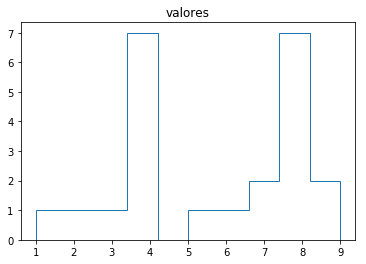

In [146]:
df.hist(histtype='step',grid=0)

In [147]:
bootstrap = pd.DataFrame({'meangrade': [df.sample(100,replace=True).valores.mean() for i in range(1000)]})

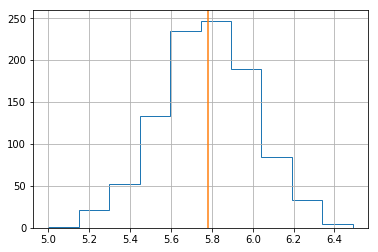

In [148]:
bootstrap.meangrade.hist(histtype='step')
plt.axvline(df.valores.mean(),color='C1')

In [149]:
bootstrap.describe()

,meangrade
count,1000.000000
mean,5.780530
std,0.228336
min,5.000000
25%,5.627500
50%,5.770000
75%,5.940000
max,6.490000


In [164]:
negoco = np.array(data)
negoco

array([1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9,
       9])

In [168]:
negoco2, negoco3 = negoco[negoco < 5], negoco[negoco >= 5]
negoco2

array([1, 2, 3, 4, 4, 4, 4, 4, 4, 4])

In [169]:
negoco3

array([5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9])

In [ ]:
if len(modes) >= 2: # se há mais de um valor com mesma "altura" no histograma
    